In [17]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos

In [18]:
df = pd.read_excel("positivos_covid.xlsx")
df

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
0,20220312,CALLAO,CALLAO,CALLAO,PR,25.0,MASCULINO,20200619.0,70101.0,24662494
1,20220312,LIMA,LIMA,CHORRILLOS,PR,37.0,FEMENINO,20200912.0,150108.0,24662689
2,20220312,LIMA,LIMA,SAN MARTIN DE PORRES,PR,25.0,MASCULINO,20201217.0,150135.0,24662153
3,20220312,AREQUIPA,AREQUIPA,AREQUIPA,PCR,27.0,MASCULINO,20220120.0,40101.0,24662155
4,20220312,ICA,PISCO,PISCO,PR,20.0,FEMENINO,20200822.0,110501.0,24662175
...,...,...,...,...,...,...,...,...,...,...
1048570,20220312,UCAYALI,CORONEL PORTILLO,CALLERIA,PCR,35.0,FEMENINO,20220125.0,250101.0,33325863
1048571,20220312,LIMA,LIMA,CARABAYLLO,PCR,36.0,FEMENINO,20210203.0,150106.0,33325872
1048572,20220312,CAJAMARCA,SAN IGNACIO,LA COIPA,PR,45.0,FEMENINO,20200819.0,60904.0,33325874
1048573,20220312,LIMA,LIMA,SAN MARTIN DE PORRES,AG,6.0,MASCULINO,20220120.0,150135.0,33325882


In [19]:
#Encontramos un valor anormal en la última fila así que procedemos a verificar el #de la fila
df['EDAD'].argmax()
#numero de fila donde esta el valor maximo de la variable edad

38352

In [27]:
df.loc[38352] #mostrar los datos de la fila

FECHA_CORTE          20220312
DEPARTAMENTO             LIMA
PROVINCIA                LIMA
DISTRITO                 LIMA
METODODX                  PCR
EDAD                   2021.0
SEXO                 FEMENINO
FECHA_RESULTADO    20220215.0
UBIGEO               150101.0
id_persona           25870101
Name: 38352, dtype: object

In [28]:
df.loc[38353]

FECHA_CORTE          20220312
DEPARTAMENTO             LIMA
PROVINCIA                LIMA
DISTRITO           LURIGANCHO
METODODX                   PR
EDAD                     78.0
SEXO                MASCULINO
FECHA_RESULTADO    20210116.0
UBIGEO               150118.0
id_persona           25175744
Name: 38353, dtype: object

<AxesSubplot:>

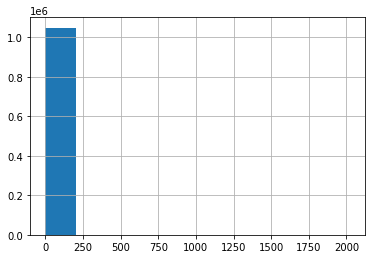

In [29]:
df.drop(38352,axis=0)['EDAD'].hist()
#drop es para eliminar la fila o columna (0= elimina fila, 1 =columna, axis)

<AxesSubplot:>

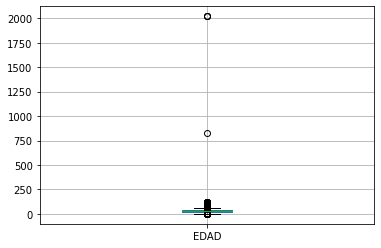

In [30]:
df.boxplot('EDAD')
#para identificar outlayers/ diagrama de cajas

<AxesSubplot:>

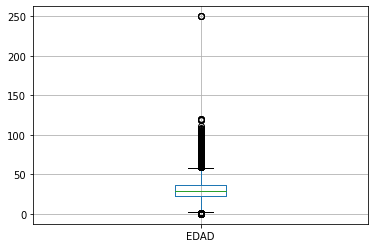

In [31]:
df[['EDAD']].clip(upper=250).boxplot()
#limita los valores a un limite superior e inferior upper/lower

<AxesSubplot:>

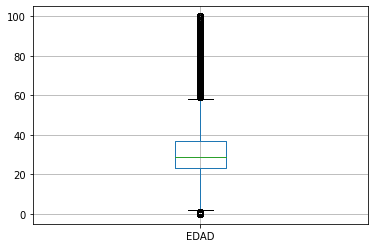

In [32]:
df[['EDAD']].clip(upper=100).boxplot()

In [33]:
df['EDAD-clip']= df['EDAD'].clip(upper=100)
print(df['EDAD-clip'])
#estoy reemplazando todos los valores mayores a 100 por 100

0          25.0
1          37.0
2          25.0
3          27.0
4          20.0
           ... 
1048570    35.0
1048571    36.0
1048572    45.0
1048573     6.0
1048574     6.0
Name: EDAD-clip, Length: 1048575, dtype: float64


In [34]:
df['EDAD-clip'].min()

0.0

In [35]:
df['EDAD-clip'].max()

100.0

In [36]:
# Validar integridad del identificador "único"
len(df['id_persona'].unique()), df.shape[0]

(983800, 1048575)

In [37]:
# Nulos en id_persona
df['id_persona'].isna() #no hay valor nulo, si fuera nulo aparecería true
#isna.sum() es la agrupación de valores

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: id_persona, Length: 1048575, dtype: bool

In [38]:
# Conteo de cuantas veces se duplican los id_persona
filtro_duplicados = df['id_persona'].duplicated(keep=False)
df[filtro_duplicados]['id_persona'].value_counts().head()

32314110    10
21271473     6
26130233     5
22932885     5
23942780     5
Name: id_persona, dtype: int64

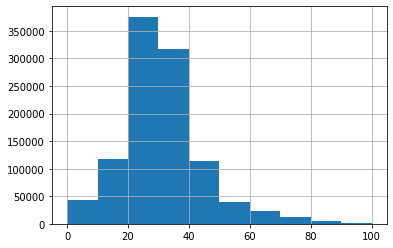

In [39]:
df['EDAD-clip'].hist()
plt.show()

In [40]:
rangos_edad = [0, 5, 11, 18, 25, 35, 50, 65, 75, 90, 100]
edad_bins = pd.cut(df['EDAD-clip'], bins=rangos_edad)

edad_bins_count = edad_bins.value_counts()

In [41]:
edad_bins_count

(25, 35]     391932
(18, 25]     223312
(35, 50]     217668
(11, 18]      80579
(50, 65]      50562
(5, 11]       37083
(0, 5]        18970
(65, 75]      15559
(75, 90]       9352
(90, 100]       871
Name: EDAD-clip, dtype: int64

<AxesSubplot:>

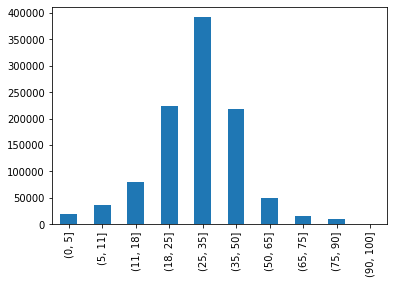

In [42]:
edad_bins_count.sort_index().plot(kind='bar')

In [43]:
df['edad_bins'] = edad_bins

In [44]:
df['SEXO'].describe()

count      1048575
unique           2
top       FEMENINO
freq        540140
Name: SEXO, dtype: object

In [45]:
df['SEXO'].value_counts(), df['SEXO'].value_counts(normalize=True)
#cuando quieres el f=, m=

(FEMENINO     540140
 MASCULINO    508435
 Name: SEXO, dtype: int64,
 FEMENINO     0.515118
 MASCULINO    0.484882
 Name: SEXO, dtype: float64)

In [46]:
# Valores perdidos / missings
df['SEXO'].isna().sum(), df['SEXO'].isna().sum() / df.shape[0]

(0, 0.0)

In [47]:
conteo_edad_x_sexo = (df[['edad_bins', 'SEXO']]
                      .groupby(['edad_bins', 'SEXO']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_edad_x_sexo.head()

,edad_bins,SEXO,conteo
0,"(0, 5]",FEMENINO,9062
1,"(0, 5]",MASCULINO,9908
2,"(5, 11]",FEMENINO,18024
3,"(5, 11]",MASCULINO,19059
4,"(11, 18]",FEMENINO,43490


In [48]:
conteo_edad_x_sexo.head

<bound method NDFrame.head of     edad_bins       SEXO  conteo
0      (0, 5]   FEMENINO    9062
1      (0, 5]  MASCULINO    9908
2     (5, 11]   FEMENINO   18024
3     (5, 11]  MASCULINO   19059
4    (11, 18]   FEMENINO   43490
5    (11, 18]  MASCULINO   37089
6    (18, 25]   FEMENINO  119605
7    (18, 25]  MASCULINO  103707
8    (25, 35]   FEMENINO  202957
9    (25, 35]  MASCULINO  188975
10   (35, 50]   FEMENINO  106269
11   (35, 50]  MASCULINO  111399
12   (50, 65]   FEMENINO   25749
13   (50, 65]  MASCULINO   24813
14   (65, 75]   FEMENINO    8015
15   (65, 75]  MASCULINO    7544
16   (75, 90]   FEMENINO    5230
17   (75, 90]  MASCULINO    4122
18  (90, 100]   FEMENINO     539
19  (90, 100]  MASCULINO     332>

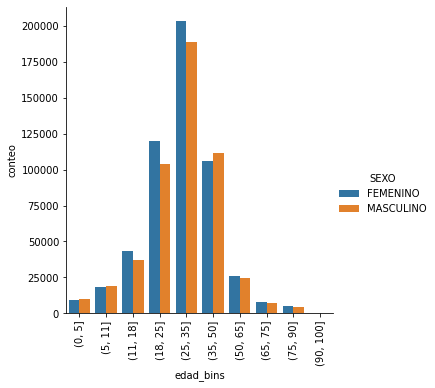

In [49]:
# Gráfica de barras de cantidad de personas por intervalo de edad en cada género
g = sns.catplot(
    data=conteo_edad_x_sexo, kind="bar",
    x="edad_bins", y="conteo", hue="SEXO",
)
g.set_xticklabels(rotation=90)
plt.show()

In [50]:
df.value_counts()

FECHA_CORTE  DEPARTAMENTO  PROVINCIA  DISTRITO                METODODX  EDAD  SEXO       FECHA_RESULTADO  UBIGEO    id_persona  EDAD-clip  edad_bins
20220312     LIMA          LIMA       LIMA                    AG        26.0  MASCULINO  20210206.0       150101.0  24312110    26.0       (25, 35]     4
                                      SAN MARTIN DE PORRES    AG        23.0  MASCULINO  20210522.0       150135.0  28385157    23.0       (18, 25]     4
                                      LIMA                    AG        30.0  MASCULINO  20220105.0       150101.0  23436161    30.0       (25, 35]     4
             JUNIN         HUANCAYO   HUANCAYO                AG        18.0  FEMENINO   20210515.0       120101.0  28312210    18.0       (11, 18]     4
             LIMA          LIMA       SAN JUAN DE MIRAFLORES  AG        33.0  FEMENINO   20210212.0       150133.0  19631944    33.0       (25, 35]     4
                                                                                 

In [51]:
local_vars = ['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']
df[local_vars].head()

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO
0,70101.0,CALLAO,CALLAO,CALLAO
1,150108.0,LIMA,LIMA,CHORRILLOS
2,150135.0,LIMA,LIMA,SAN MARTIN DE PORRES
3,40101.0,AREQUIPA,AREQUIPA,AREQUIPA
4,110501.0,ICA,PISCO,PISCO


In [52]:
df['UBIGEO'] = df['UBIGEO'].astype(str)

In [53]:
# Conteo de valores nulos para mi dataframe creado local_vars
df[local_vars].isna().sum()

UBIGEO           0
DEPARTAMENTO    83
PROVINCIA        0
DISTRITO         0
dtype: int64

In [54]:
#dropna para eliminar valores nulos
df= df.dropna()

In [55]:
df.DISTRITO.unique()

array(['CALLAO', 'CHORRILLOS', 'SAN MARTIN DE PORRES', ..., 'MAMARA',
       'MANGAS', 'SANTIAGO DE ANCHUCAYA'], dtype=object)

In [56]:
n_dis = pd.DataFrame(df.DISTRITO.unique()).set_index(0)
n_dis


""
0
CALLAO
CHORRILLOS
SAN MARTIN DE PORRES
AREQUIPA
PISCO
...
AMASHCA
RAPAYAN
MAMARA


In [57]:
n_dis.shape

(1677, 0)

In [58]:
n_dis.loc["EN INVESTIGACIÃ“N"].T

Series([], Name: EN INVESTIGACIÃ“N, dtype: float64)

In [59]:
df[df['DISTRITO']=='EN INVESTIGACIÃ“N'].size

604812

In [60]:
df.shape

(1045228, 12)

In [61]:
# df.loc es para encontrar la ubicacion de la fila, dentro del corchete le damos el valor 
# != no queremos que contenga " EN INVESTIGACIÃ“N"
# le estamos diciendo a mi tabla que no contenga estos valores
df = df.loc[(df["DISTRITO"] != 'EN INVESTIGACIÃ“N')]

In [62]:
df.shape

(994827, 12)

In [63]:
df[df['UBIGEO']=='nan'].size

0

In [64]:
df[local_vars].isnull().sum()

UBIGEO          0
DEPARTAMENTO    0
PROVINCIA       0
DISTRITO        0
dtype: int64

In [65]:
df.isna().sum()

FECHA_CORTE        0
DEPARTAMENTO       0
PROVINCIA          0
DISTRITO           0
METODODX           0
EDAD               0
SEXO               0
FECHA_RESULTADO    0
UBIGEO             0
id_persona         0
EDAD-clip          0
edad_bins          0
dtype: int64

In [68]:
df.head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,EDAD-clip,edad_bins,AÑO_RESULTADO
0,20220312,CALLAO,CALLAO,CALLAO,PR,25.0,MASCULINO,20200619.0,70101.0,24662494,25.0,"(18, 25]",2020
1,20220312,LIMA,LIMA,CHORRILLOS,PR,37.0,FEMENINO,20200912.0,150108.0,24662689,37.0,"(35, 50]",2020
2,20220312,LIMA,LIMA,SAN MARTIN DE PORRES,PR,25.0,MASCULINO,20201217.0,150135.0,24662153,25.0,"(18, 25]",2020
3,20220312,AREQUIPA,AREQUIPA,AREQUIPA,PCR,27.0,MASCULINO,20220120.0,40101.0,24662155,27.0,"(25, 35]",2022
4,20220312,ICA,PISCO,PISCO,PR,20.0,FEMENINO,20200822.0,110501.0,24662175,20.0,"(18, 25]",2020


In [66]:
df['AÑO_RESULTADO'] = df['FECHA_RESULTADO'].astype(str).str[0:4].astype(int)
#la columna de la fecha la convierto en string, una vez que esta convertido podemos hacer tecnicas
#de procesamiento de datos textuales. nos quedamos con 4 digitos [0:4]

In [67]:
df['AÑO_RESULTADO'].head()

0    2020
1    2020
2    2020
3    2022
4    2020
Name: AÑO_RESULTADO, dtype: int32

In [69]:
#agrupamiento por año resultado y poner un contador
df.groupby(by='AÑO_RESULTADO')['id_persona'].count()
#agrupamos el dataframe por una columna, seleccionamos la columna y contamos cuantos casos hay
#por cada resultado

AÑO_RESULTADO
2020    258058
2021    349432
2022    387337
Name: id_persona, dtype: int64

In [72]:
df[df['id_persona'].duplicated(keep=False)].sort_values(by='id_persona')
#pasarle el dt entero y solo me quedo con valores positivos y los agrupamos por el id persona

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,EDAD-clip,edad_bins,AÑO_RESULTADO
55174,20220312,ICA,PALPA,PALPA,AG,40.0,MASCULINO,20211102.0,110401.0,19367925,40.0,"(35, 50]",2021
54993,20220312,ICA,PALPA,PALPA,PCR,40.0,MASCULINO,20211105.0,110401.0,19367925,40.0,"(35, 50]",2021
55303,20220312,HUANCAVELICA,CHURCAMPA,CHURCAMPA,PCR,48.0,MASCULINO,20211210.0,90501.0,19368164,48.0,"(35, 50]",2021
54994,20220312,HUANCAVELICA,CHURCAMPA,CHURCAMPA,AG,47.0,MASCULINO,20210331.0,90501.0,19368164,47.0,"(35, 50]",2021
65502,20220312,LIMA,LIMA,LIMA,PCR,34.0,FEMENINO,20220122.0,150101.0,19368725,34.0,"(25, 35]",2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043500,20220312,LIMA,LIMA,LIMA,PCR,5.0,FEMENINO,20220127.0,150101.0,34039240,5.0,"(0, 5]",2022
1040865,20220312,APURIMAC,ANDAHUAYLAS,TALAVERA,PCR,25.0,MASCULINO,20220119.0,30216.0,34095894,25.0,"(18, 25]",2022
1041188,20220312,APURIMAC,ANDAHUAYLAS,TALAVERA,AG,25.0,MASCULINO,20220116.0,30216.0,34095894,25.0,"(18, 25]",2022
1043202,20220312,ANCASH,HUARAZ,HUARAZ,AG,37.0,FEMENINO,20220106.0,20101.0,34119558,37.0,"(35, 50]",2022


In [73]:
# Conteo de cuantas veces se duplican los id_persona
filtro_duplicados = df['id_persona'].duplicated(keep=False)
df[filtro_duplicados]['id_persona'].value_counts().head()

32314110    10
21271473     6
23942780     5
22585553     5
25836207     5
Name: id_persona, dtype: int64

In [75]:
df[df['id_persona']==32314110]
#el id persona es el ..... si o no?


,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,EDAD-clip,edad_bins,AÑO_RESULTADO
974031,20220312,LIMA,LIMA,BREÃ‘A,PCR,22.0,FEMENINO,20201226.0,150105.0,32314110,22.0,"(18, 25]",2020
974032,20220312,LIMA,LIMA,LIMA,AG,22.0,FEMENINO,20210114.0,150101.0,32314110,22.0,"(18, 25]",2021
974033,20220312,LIMA,LIMA,LIMA,AG,23.0,FEMENINO,20201223.0,150101.0,32314110,23.0,"(18, 25]",2020
974034,20220312,LIMA,LIMA,LIMA,AG,23.0,FEMENINO,20201223.0,150101.0,32314110,23.0,"(18, 25]",2020
974123,20220312,LIMA,LIMA,LIMA,AG,23.0,FEMENINO,20201223.0,150101.0,32314110,23.0,"(18, 25]",2020
974124,20220312,LIMA,LIMA,LIMA,AG,23.0,FEMENINO,20201223.0,150101.0,32314110,23.0,"(18, 25]",2020
974125,20220312,LIMA,LIMA,LIMA,AG,22.0,FEMENINO,20201223.0,150101.0,32314110,22.0,"(18, 25]",2020
974126,20220312,LIMA,LIMA,LIMA,AG,22.0,FEMENINO,20201223.0,150101.0,32314110,22.0,"(18, 25]",2020
974127,20220312,LIMA,LIMA,LIMA,AG,22.0,FEMENINO,20201223.0,150101.0,32314110,22.0,"(18, 25]",2020
974143,20220312,LIMA,LIMA,LIMA,AG,22.0,FEMENINO,20201223.0,150101.0,32314110,22.0,"(18, 25]",2020


In [76]:
df.groupby(by='METODODX')['id_persona'].nunique()
#veamos cuantos id personas unicos hay por cada método

METODODX
AG     443304
PCR    277792
PR     256047
Name: id_persona, dtype: int64

In [77]:
df['id_persona'].nunique()

935494

In [78]:
df.query("METODODX=='PCR'")
#seleccionas una columna segpun metodo de diagnostico

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,EDAD-clip,edad_bins,AÑO_RESULTADO
3,20220312,AREQUIPA,AREQUIPA,AREQUIPA,PCR,27.0,MASCULINO,20220120.0,40101.0,24662155,27.0,"(25, 35]",2022
9,20220312,LIMA,LIMA,SANTIAGO DE SURCO,PCR,19.0,FEMENINO,20220213.0,150140.0,24662215,19.0,"(18, 25]",2022
12,20220312,TUMBES,TUMBES,PAMPAS DE HOSPITAL,PCR,15.0,MASCULINO,20220203.0,240104.0,24662248,15.0,"(11, 18]",2022
16,20220312,APURIMAC,ANDAHUAYLAS,ANDAHUAYLAS,PCR,31.0,FEMENINO,20210130.0,30201.0,24662310,31.0,"(25, 35]",2021
19,20220312,LIMA,LIMA,LA VICTORIA,PCR,31.0,FEMENINO,20210320.0,150115.0,24662333,31.0,"(25, 35]",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048561,20220312,LIMA,LIMA,CHORRILLOS,PCR,38.0,MASCULINO,20210323.0,150108.0,33325746,38.0,"(35, 50]",2021
1048563,20220312,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,35.0,MASCULINO,20210315.0,150143.0,33325772,35.0,"(25, 35]",2021
1048566,20220312,LIMA,LIMA,CARABAYLLO,PCR,34.0,MASCULINO,20210218.0,150106.0,33325818,34.0,"(25, 35]",2021
1048570,20220312,UCAYALI,CORONEL PORTILLO,CALLERIA,PCR,35.0,FEMENINO,20220125.0,250101.0,33325863,35.0,"(25, 35]",2022


In [79]:
df.query("METODODX=='PCR'").groupby('AÑO_RESULTADO')['id_persona'].nunique()
#agrupar por año/resultado solo para los casos de pcr cuando id persona unicos existen

AÑO_RESULTADO
2020     47957
2021    116740
2022    114752
Name: id_persona, dtype: int64

In [80]:
df.query("METODODX=='PR'").groupby('AÑO_RESULTADO')['id_persona'].nunique()

AÑO_RESULTADO
2020    209474
2021     46455
2022       120
Name: id_persona, dtype: int64

In [81]:
df.query("METODODX=='AG'").groupby('AÑO_RESULTADO')['id_persona'].nunique()

AÑO_RESULTADO
2020       122
2021    178209
2022    268881
Name: id_persona, dtype: int64

In [84]:
df.query("METODODX=='PCR'").head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,EDAD-clip,edad_bins,AÑO_RESULTADO
3,20220312,AREQUIPA,AREQUIPA,AREQUIPA,PCR,27.0,MASCULINO,20220120.0,40101.0,24662155,27.0,"(25, 35]",2022
9,20220312,LIMA,LIMA,SANTIAGO DE SURCO,PCR,19.0,FEMENINO,20220213.0,150140.0,24662215,19.0,"(18, 25]",2022
12,20220312,TUMBES,TUMBES,PAMPAS DE HOSPITAL,PCR,15.0,MASCULINO,20220203.0,240104.0,24662248,15.0,"(11, 18]",2022
16,20220312,APURIMAC,ANDAHUAYLAS,ANDAHUAYLAS,PCR,31.0,FEMENINO,20210130.0,30201.0,24662310,31.0,"(25, 35]",2021
19,20220312,LIMA,LIMA,LA VICTORIA,PCR,31.0,FEMENINO,20210320.0,150115.0,24662333,31.0,"(25, 35]",2021


In [85]:
df.query("METODODX=='PCR'").reset_index(drop=True).head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,EDAD-clip,edad_bins,AÑO_RESULTADO
0,20220312,AREQUIPA,AREQUIPA,AREQUIPA,PCR,27.0,MASCULINO,20220120.0,40101.0,24662155,27.0,"(25, 35]",2022
1,20220312,LIMA,LIMA,SANTIAGO DE SURCO,PCR,19.0,FEMENINO,20220213.0,150140.0,24662215,19.0,"(18, 25]",2022
2,20220312,TUMBES,TUMBES,PAMPAS DE HOSPITAL,PCR,15.0,MASCULINO,20220203.0,240104.0,24662248,15.0,"(11, 18]",2022
3,20220312,APURIMAC,ANDAHUAYLAS,ANDAHUAYLAS,PCR,31.0,FEMENINO,20210130.0,30201.0,24662310,31.0,"(25, 35]",2021
4,20220312,LIMA,LIMA,LA VICTORIA,PCR,31.0,FEMENINO,20210320.0,150115.0,24662333,31.0,"(25, 35]",2021


In [89]:
casos_pcr.reset_index()

,AÑO_RESULTADO,id_persona
0,2020,47957
1,2021,116740
2,2022,114752


In [99]:
casos_pcr= df.query("METODODX=='PCR'").reset_index(drop=True).groupby('AÑO_RESULTADO')['id_persona'].nunique().reset_index()
#cuando hacemos un query generalmente el indice se va a quedar según los casos de pcr
# con el reset index se cambia el indice
#al final colocamos de nuevo un reset index para tenerlo en un cuadro de dataframe

In [100]:
casos_pcr= casos_pcr.rename(columns={'id_persona':'id_persona_nunique'})
#al dataframe le hacemos un rename de las columnas, le pasamos un diccionario

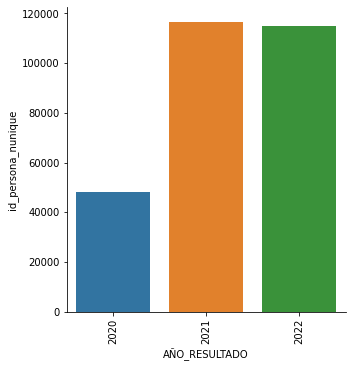

In [101]:
g = sns.catplot(
    data=casos_pcr, kind="bar",
    x="AÑO_RESULTADO", y="id_persona_nunique",
)
g.set_xticklabels(rotation=90)
plt.show()

In [102]:
casos_pcr_sexo= df.query("METODODX=='PCR'").reset_index(drop=True).groupby(['AÑO_RESULTADO','SEXO'])['id_persona'].nunique().reset_index()
#dentro del metodo del groupby se utiliza una lista pra tener el agrupador por mas de una variable

In [103]:
casos_pcr_sexo= casos_pcr_sexo.rename(columns={'id_persona':'id_persona_nunique'})

In [104]:
casos_pcr_sexo

,AÑO_RESULTADO,SEXO,id_persona_nunique
0,2020,FEMENINO,22054
1,2020,MASCULINO,25904
2,2021,FEMENINO,56547
3,2021,MASCULINO,60197
4,2022,FEMENINO,59004
5,2022,MASCULINO,55749


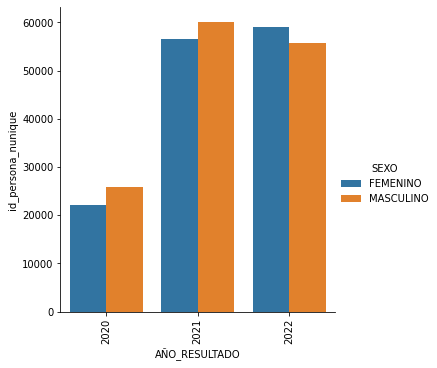

In [105]:
g = sns.catplot(
    data=casos_pcr_sexo, kind="bar",
    x="AÑO_RESULTADO", y="id_persona_nunique",hue="SEXO",
)
g.set_xticklabels(rotation=90)
plt.show()

In [106]:
#Empezaremos con la libreria geopandas, para eso primero la importamos
import geopandas as gpd 

In [124]:
geo_deps = gpd.read_file('LIMITE_DEPARTAMENTAL (1).zip')
geo_provs = gpd.read_file('LIMITE_PROVINCIAL.zip')
geo_dists = gpd.read_file('LIMITE_DISTRITAL.zip',encoding='latin1')

In [125]:
geo_dist_lima=geo_dists.query("NOMBDEP=='LIMA'").reset_index(drop=True)

<AxesSubplot:>

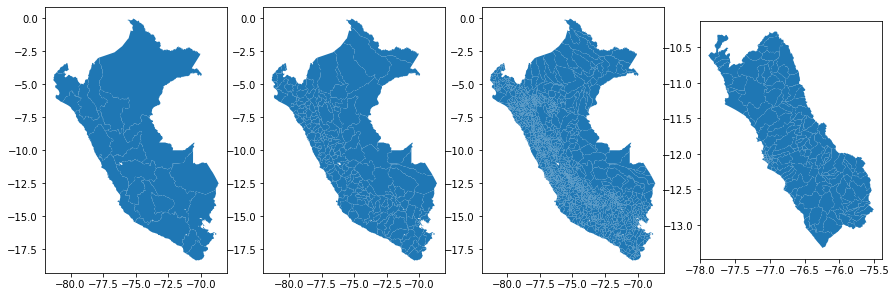

In [126]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4,
                                    figsize=(15, 5))

geo_deps.plot(ax=ax1)
geo_provs.plot(linewidth=0.5, ax=ax2)
geo_dists.plot(linewidth=0.1, ax=ax3)
geo_dist_lima.plot(linewidth=0.5, ax=ax4)

In [109]:
df_PCR= df.query("METODODX=='PCR'").reset_index(drop=True)
#nombrar con el query según método, el query me filtra solo los casos pcr

In [45]:
#ESTO ERA PARA VOLVERLO STRING
df_PCR['UBIGEO'] = df_PCR['UBIGEO'].astype(str)

In [51]:
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].astype(str)

In [110]:
# VALIDAMOS QUE LOS NOMBRES DE DEPARTAMENTOS
# EN LOS DOS DATASETS SEAN IGUALES
df_unique_dep = df_PCR['DEPARTAMENTO'].unique()
df_unique_dep.sort()

gdf_unique_dep = geo_deps['NOMBDEP'].unique()
gdf_unique_dep.sort()

#(df_unique_dep == gdf_unique_dep).all() # True

In [111]:
(df_unique_dep == gdf_unique_dep).all() # True

True

In [112]:
# Contamos la cantidad de casos positivos por departamento
conteo_dept = df_PCR['DEPARTAMENTO'].value_counts()
conteo_dept = conteo_dept.reset_index()
conteo_dept.head()

,index,DEPARTAMENTO
0,LIMA,158491
1,CALLAO,15927
2,AREQUIPA,15856
3,CAJAMARCA,9826
4,LA LIBERTAD,8500


In [113]:
# Unimos los conteos utilizando los nombres de departamentos
geo_conteo_dept = pd.merge(left=geo_deps, right=conteo_dept, 
                             left_on="NOMBDEP", right_on='index')

<AxesSubplot:>

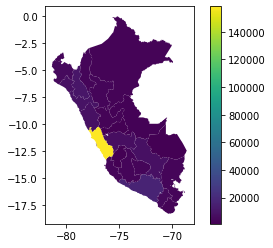

In [114]:
# Mapa de calor de # de casos positivos por departamento
geo_conteo_dept.plot("DEPARTAMENTO", cmap='viridis',
                       legend=True)